# **Importing Libraries**

In [1]:
# Necessary Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LinearRegression , Ridge , LogisticRegression
from sklearn.preprocessing import LabelEncoder , PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error
from scipy import stats
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from graphviz import Source
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix , classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score as auc
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
# # Necessary Imports
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# import statsmodels.api as sm
# from sklearn.linear_model import LinearRegression , Ridge , LogisticRegression
# from sklearn.preprocessing import LabelEncoder , PolynomialFeatures
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score , mean_squared_error
# from scipy import stats
# from sklearn.pipeline import make_pipeline
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn import tree
# from sklearn.tree import DecisionTreeClassifier
# from xgboost import XGBClassifier
# from sklearn.ensemble import RandomForestClassifier
# from imblearn.over_sampling import SMOTE
# from graphviz import Source
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import confusion_matrix , classification_report
# from mlxtend.plotting import plot_confusion_matrix
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.metrics import f1_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import roc_auc_score as auc
# import warnings
# warnings.filterwarnings('ignore')

# **Reading and Pre-Processing of the data**

In [8]:
df=pd.read_csv('/content/brain_stroke.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [10]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

df.iloc[:,0] = encoder.fit_transform(np.array(df.iloc[:,0]))
df.iloc[:,4] = encoder.fit_transform(np.array(df.iloc[:,4]))
df.iloc[:,5] = encoder.fit_transform(np.array(df.iloc[:,5]))
df.iloc[:,6] = encoder.fit_transform(np.array(df.iloc[:,6]))
df.iloc[:,9] = encoder.fit_transform(np.array(df.iloc[:,9]))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   int64  
 6   Residence_type     4981 non-null   int64  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   int64  
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 428.2 KB


In [12]:
for i in df.columns:
    print(df[i].value_counts())

0    2907
1    2074
Name: gender, dtype: int64
78.00    102
57.00     92
54.00     85
51.00     84
79.00     84
        ... 
1.16       3
0.48       3
0.40       2
0.08       2
0.16       1
Name: age, Length: 104, dtype: int64
0    4502
1     479
Name: hypertension, dtype: int64
0    4706
1     275
Name: heart_disease, dtype: int64
1    3280
0    1701
Name: ever_married, dtype: int64
1    2860
2     804
3     673
0     644
Name: work_type, dtype: int64
1    2532
0    2449
Name: Residence_type, dtype: int64
93.88     6
73.00     5
83.16     5
91.85     5
72.49     5
         ..
130.56    1
67.78     1
116.12    1
59.63     1
83.94     1
Name: avg_glucose_level, Length: 3895, dtype: int64
28.7    42
28.4    41
27.3    38
27.7    37
26.7    37
        ..
48.4     1
48.2     1
46.6     1
40.6     1
14.9     1
Name: bmi, Length: 342, dtype: int64
2    1838
0    1500
1     867
3     776
Name: smoking_status, dtype: int64
0    4733
1     248
Name: stroke, dtype: int64


# **Selecting x and y**

In [13]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

y.value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [14]:
# Over samplng is a practice performed usually in such datasets
# where count of a particular class is very less compared to 
# another but that class is the one whose classification is more 
# important. As in this question identification of a person with 
# high stroke probability is more essential than identifying many 
# people with no chances of stroke.

from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

y.value_counts()

1    4733
0    4733
Name: stroke, dtype: int64

# **Splitting Of Dataset into train and test** 

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, random_state=44,stratify=y)

In [16]:
# <!-- <!-- There are several machine learning algorithms that can be used to predict the risk of heart stroke, other than neural networks. Here are a few examples:

# 1. Logistic regression: This is a simple and interpretable algorithm that is commonly used for binary classification problems, such as predicting whether someone is at risk of having a heart stroke or not. Logistic regression can be used to model the relationship between the input features and the output variable, and can provide insights into which features are most important in predicting the outcome.

# 2. Decision trees: This algorithm is based on a tree-like model of decisions and their possible consequences. Decision trees can be used to identify important features for predicting the outcome and can be easily interpreted. However, they can be prone to overfitting if not properly tuned.

# 3. Random forests: This is an ensemble learning algorithm that uses multiple decision trees to make predictions. Random forests can be more accurate than individual decision trees and can also help prevent overfitting. They can also provide insights into feature importance.

# 4. Support vector machines: This is a binary classification algorithm that works by finding the hyperplane that best separates the two classes. Support vector machines can work well when there is a clear boundary between the two classes, and they can also handle non-linear relationships between the input features and the output variable.

# It is important to note that the choice of algorithm will depend on the specific requirements of the problem, the characteristics of the data, and the resources available for training and deploying the model. A thorough analysis of the data and experimentation with different algorithms can help determine which algorithm is most suitable for a particular task. -->

# <!-- Sure, here are some more machine learning models that can be used for predicting the risk of heart stroke:

# 1. K-Nearest Neighbors (KNN): This is a non-parametric algorithm that works by finding the K-nearest data points to a new data point and predicting the outcome based on the majority class of those nearest points. KNN can work well when there is a clear boundary between the two classes, but it can be sensitive to the choice of K and the distance metric used.

# 2. Naive Bayes: This is a probabilistic algorithm that works by modeling the conditional probability of each feature given the class and using Bayes' theorem to calculate the probability of each class given the observed features. Naive Bayes can work well when the features are independent, and it is computationally efficient and scalable.

# 3. Gradient Boosting Machines (GBM): This is an ensemble learning algorithm that works by combining multiple weak learners, such as decision trees, to create a strong learner. GBM can work well when there are complex, non-linear relationships between the input features and the output variable.

# 4. XGBoost: This is a variation of GBM that uses a more regularized model to prevent overfitting, and it also has some additional features such as parallel processing and handling missing values.

# Again, it's important to note that the choice of model will depend on the specific characteristics of the data and the requirements of the problem. Experimentation with different models and feature engineering can help determine which model is most suitable for a particular task. --> -->

Function for calculating ROC

In [17]:
def ROC_curve(X_test,y_test,y_pred,model):
  roc_scores = []

  thresholds = np.linspace(0, 0.05, 200)
  for threshold in thresholds:
      pred = model.predict_proba(X_test)
      pred = np.where(pred[:, 1] < threshold, 0, 1)

      cm = confusion_matrix(y_test, pred)
      roc_score = auc(y_test, pred)
      roc_scores.append(roc_score)

      # Visualize the change in ROC score with a change in threshold.

  roc_scores = np.array(roc_scores)
  best_roc_score = np.max(roc_scores)
  best_threshold = thresholds[np.argmax(roc_scores)]

  plt.plot(thresholds, roc_scores)
  plt.grid()
  plt.show()

  print("The best ROC score is:", best_roc_score)


# **Visualization Of Processed Data**

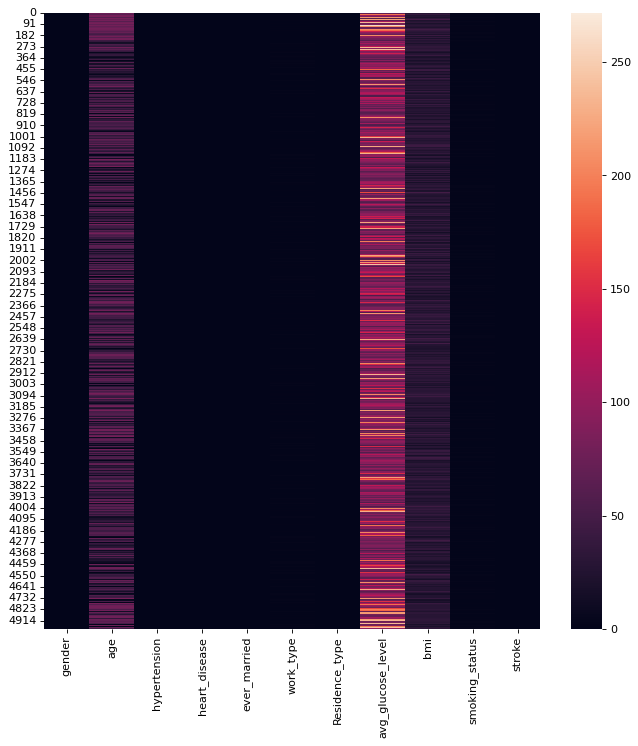

In [ ]:
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)
p1 = sns.heatmap(df)
plt.show()

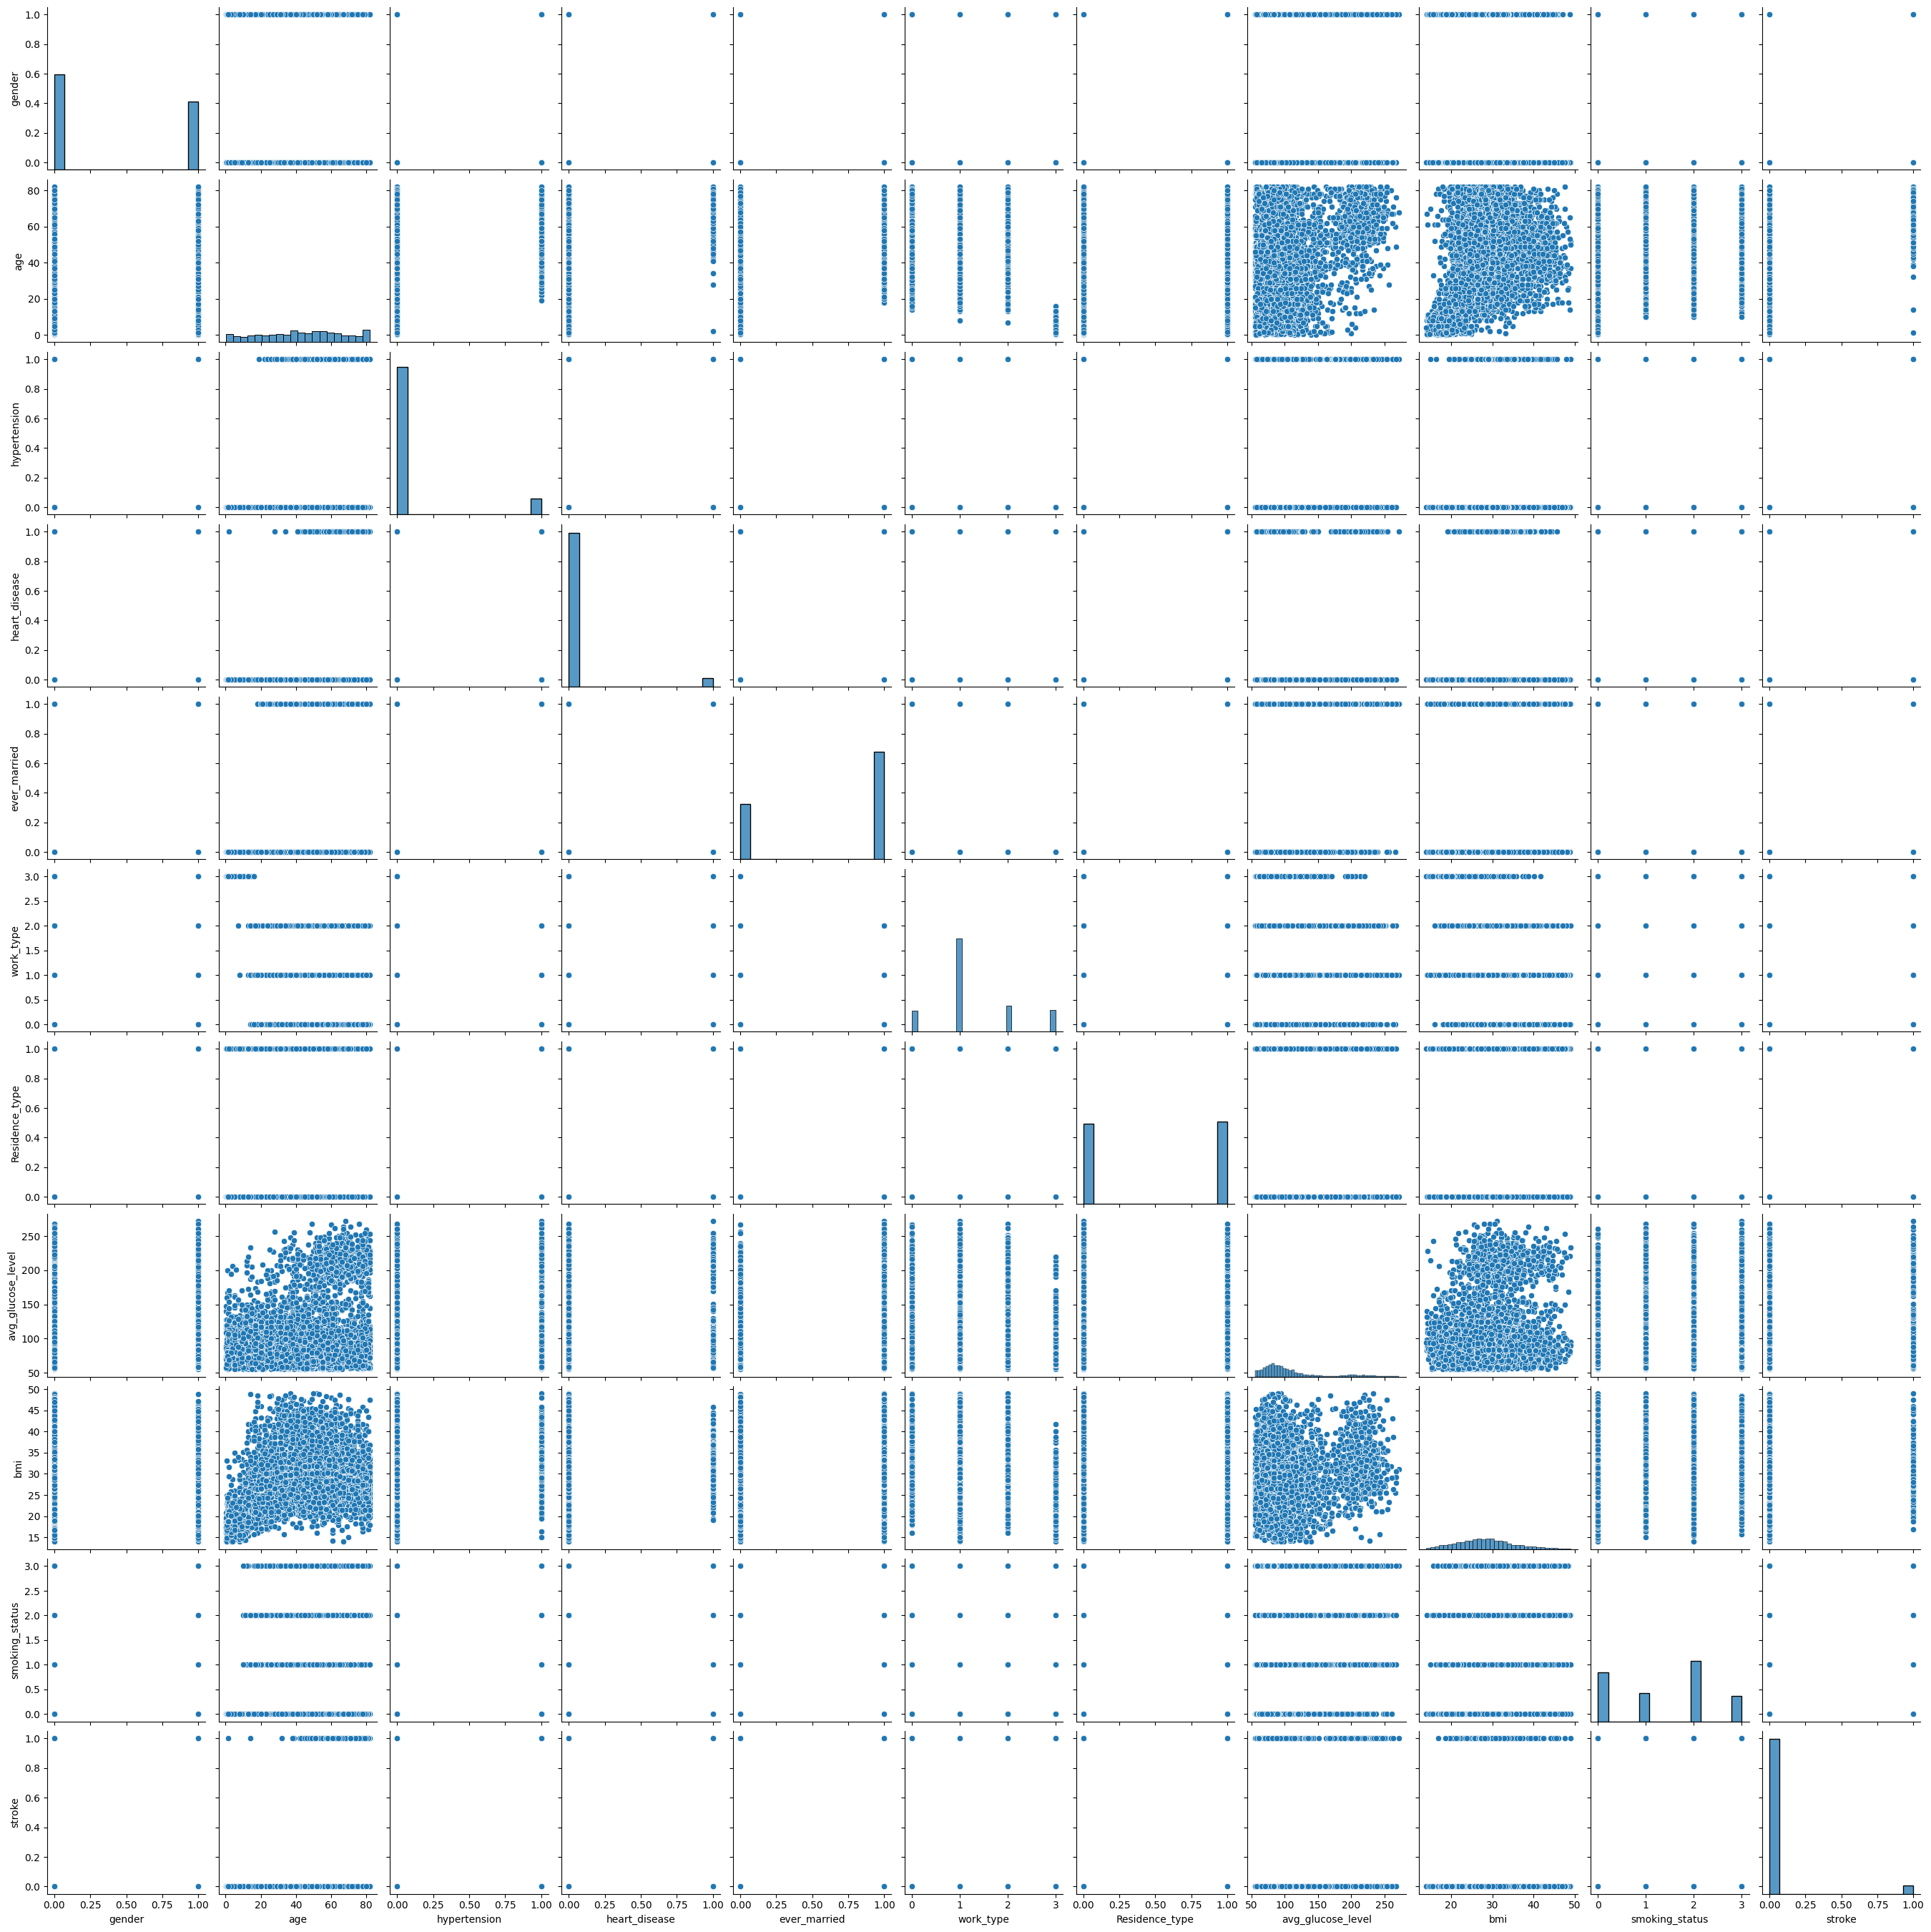

In [ ]:
sns.pairplot(df)
plt.show()

<Axes: xlabel='Residence_type', ylabel='count'>

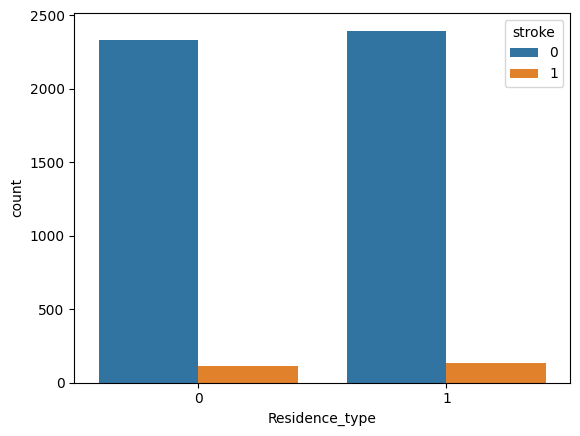

In [ ]:
sns.countplot(x="Residence_type", hue="stroke", data=df)

<Axes: xlabel='smoking_status', ylabel='count'>

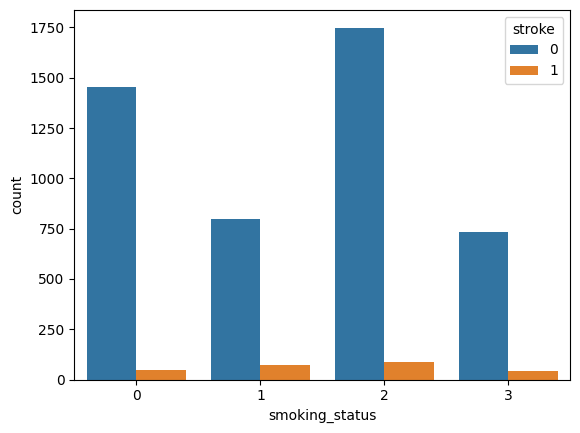

In [ ]:
sns.countplot(x="smoking_status", hue="stroke", data=df)

<Axes: xlabel='heart_disease', ylabel='count'>

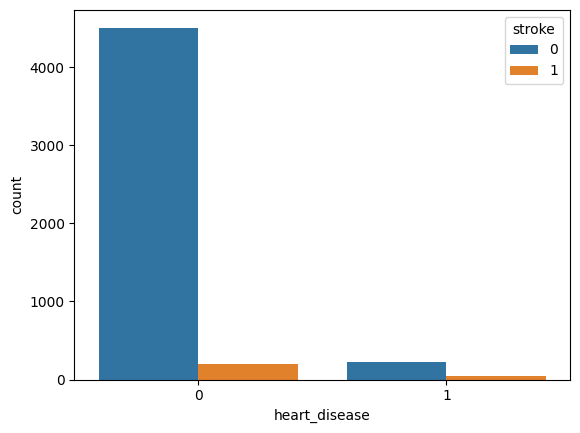

In [ ]:
sns.countplot(x="heart_disease", hue="stroke", data=df)

<Axes: xlabel='work_type', ylabel='count'>

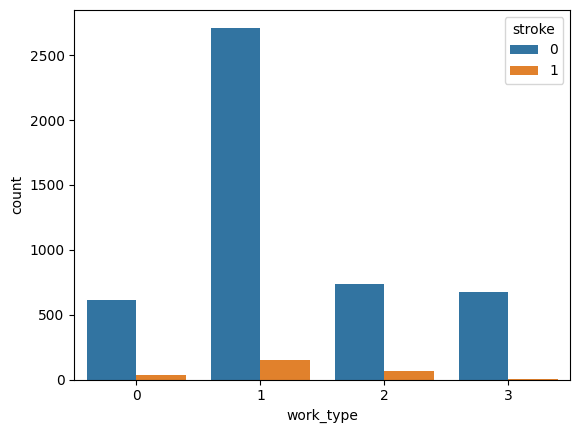

In [ ]:
sns.countplot(x="work_type", hue="stroke", data=df)

<Axes: xlabel='gender', ylabel='count'>

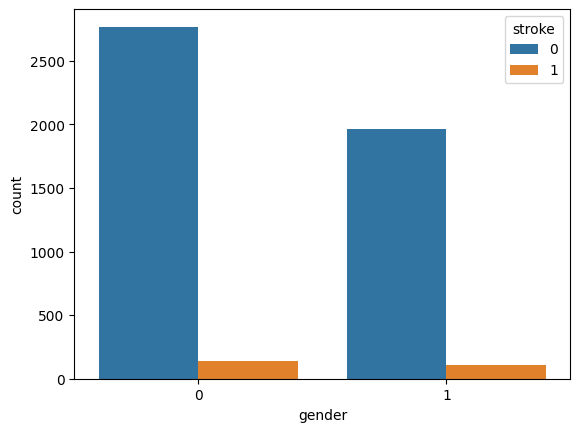

In [ ]:
sns.countplot(x="gender", hue="stroke", data=df)

<Axes: xlabel='bmi', ylabel='age'>

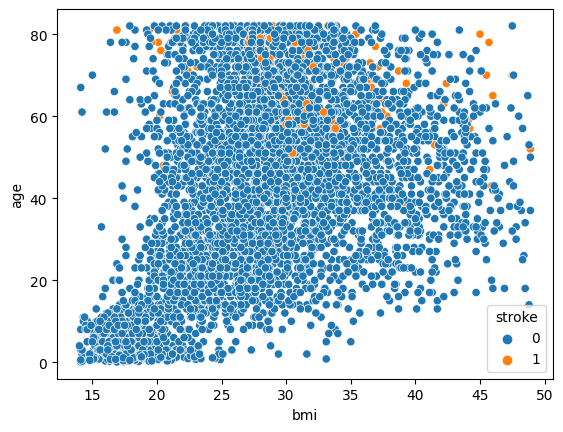

In [ ]:
sns.scatterplot(data=df, x="bmi", y="age",hue="stroke")

<Axes: xlabel='avg_glucose_level', ylabel='bmi'>

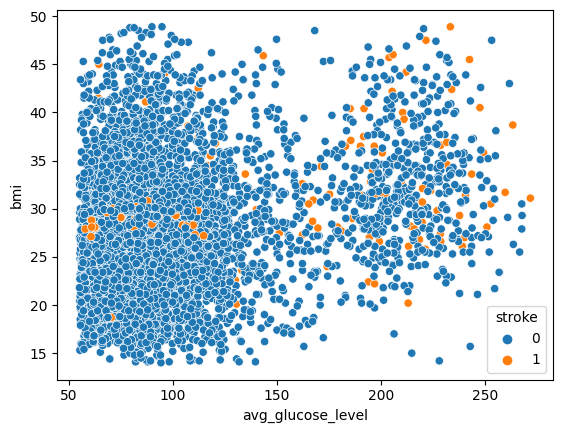

In [ ]:
sns.scatterplot(data=df, x="avg_glucose_level", y="bmi",hue="stroke")

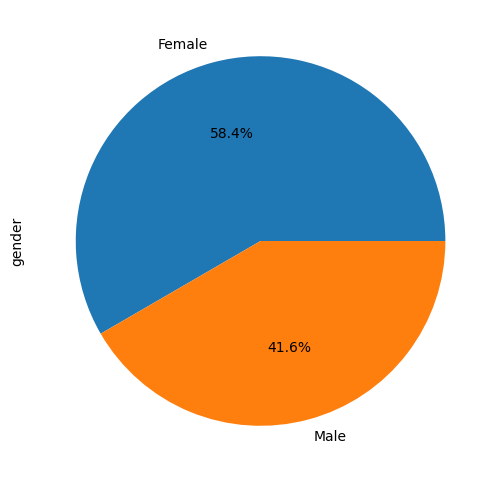

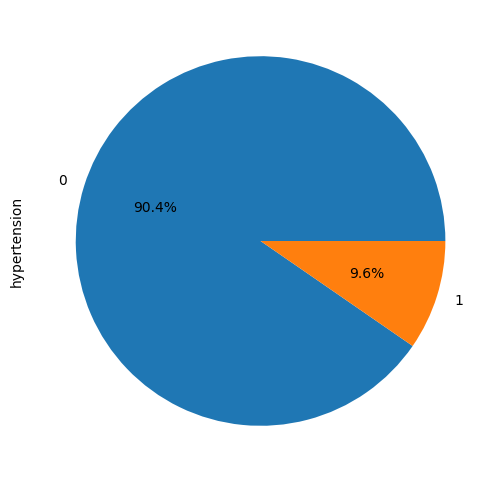

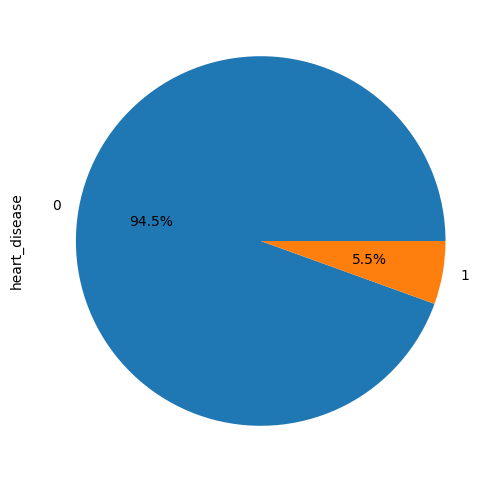

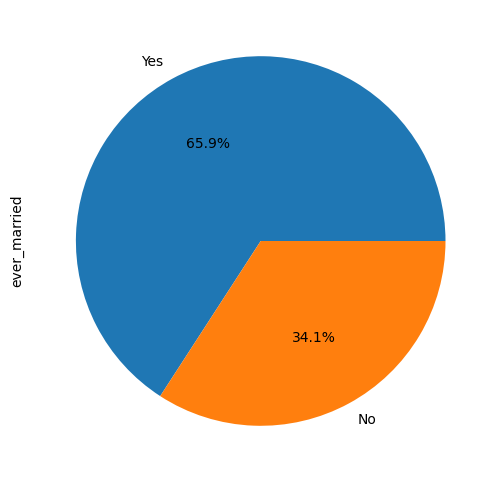

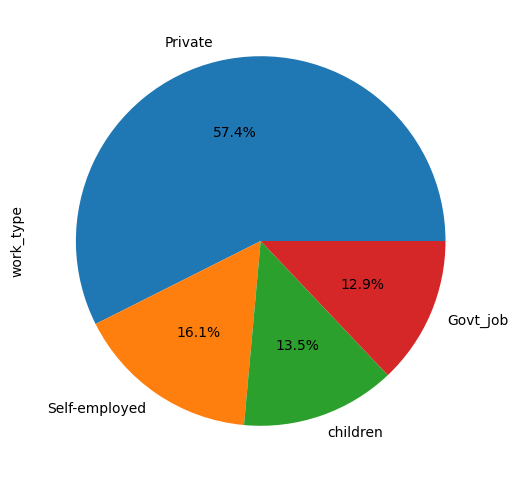

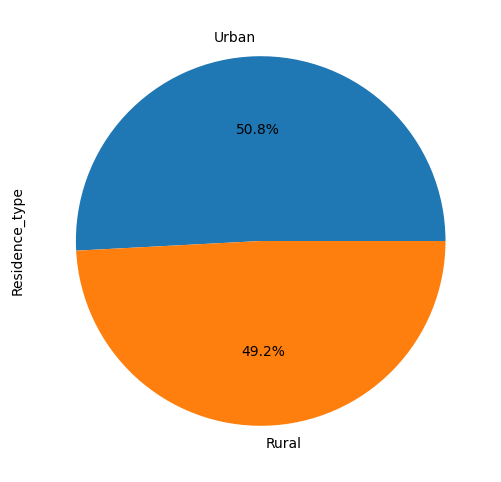

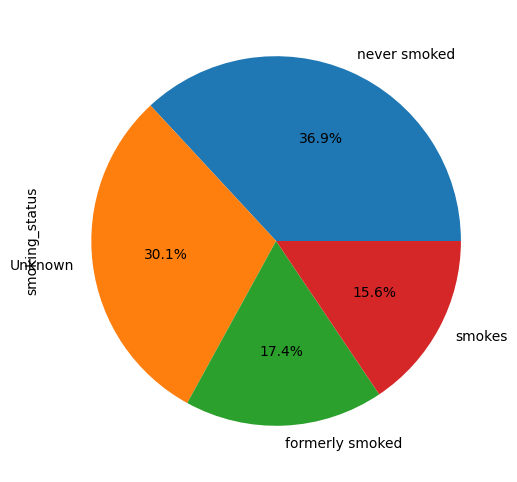

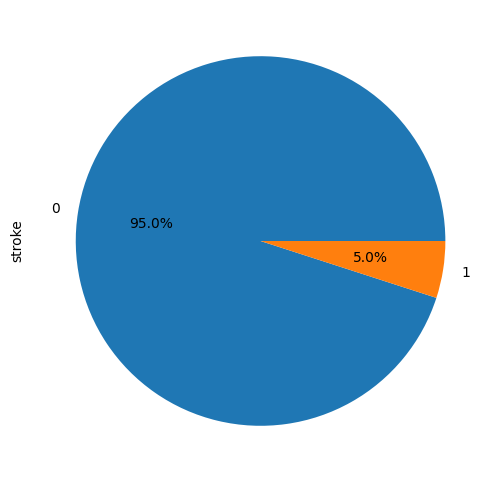

In [ ]:
for i in df1 .columns:
    plt.figure(figsize=(15,6))
    df1 [i].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: ylabel='stroke'>

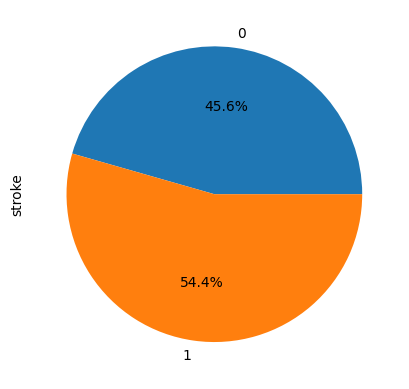

In [ ]:
Residence=df.groupby(['Residence_type'])['stroke'].sum()
Residence.plot(kind='pie',autopct='%1.1f%%')

<Axes: ylabel='stroke'>

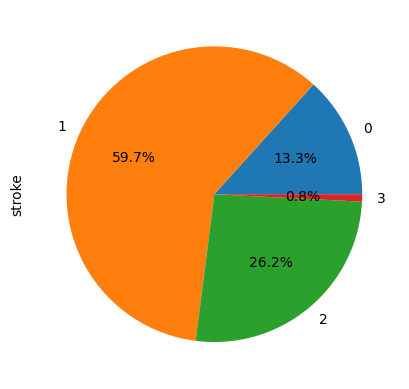

In [ ]:
worktype=df.groupby(['work_type'])['stroke'].sum()
worktype.plot(kind='pie',autopct='%1.1f%%')

<Axes: ylabel='stroke'>

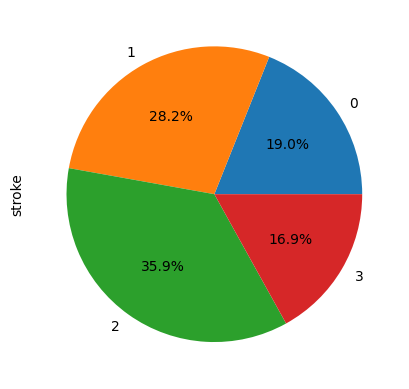

In [ ]:
Smoke=df.groupby(['smoking_status'])['stroke'].sum()
Smoke.plot(kind='pie',autopct='%1.1f%%')

<Axes: ylabel='stroke'>

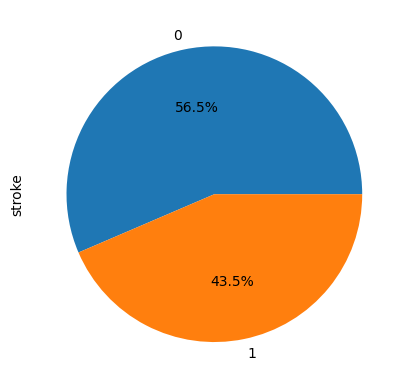

In [ ]:
Gender=df.groupby(['gender'])['stroke'].sum()
Gender.plot(kind='pie',autopct='%1.1f%%')

# **Training across various models**

# **LightGBM Model**

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

Finding the optimum number of leaves

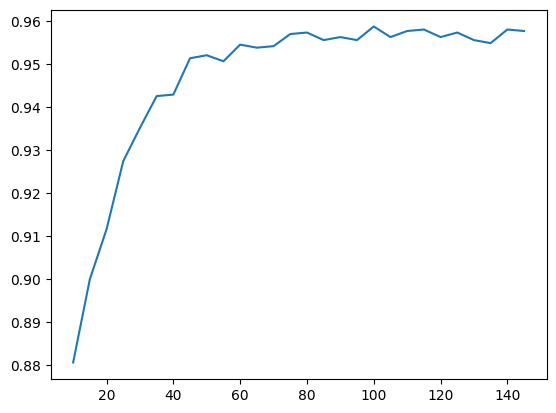

In [ ]:
num_leaves=[]
accuracy=[]
for i in range(10,150,5):
  model = lgb.LGBMClassifier(num_leaves=i)
  model.fit(X_train, y_train)
  pred=model.predict(X_test)
  num_leaves.append(i)
  accuracy.append(accuracy_score(pred, y_test))

# Plotting the graph for better visualisation

plt.plot(num_leaves, accuracy)
plt.show()

# choosed num_leaves=95

Finding optimum max_depth

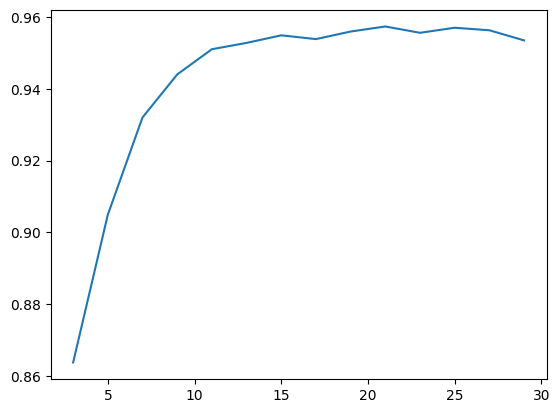

In [ ]:
max_depth=[]
accuracy1=[]
for i in range(3,30,2):
  model = lgb.LGBMClassifier(max_depth=i, num_leaves=95)
  model.fit(X_train, y_train)
  pred=model.predict(X_test)
  max_depth.append(i)
  accuracy1.append(accuracy_score(pred, y_test))

# Visualising max_depth vs accuracy

plt.plot(max_depth, accuracy1)
plt.show()

# max depth choosed=18

Accuracy and Confusion Matrix

The Accuracy of hypertuned LightGBM model is =  0.9556338028169014


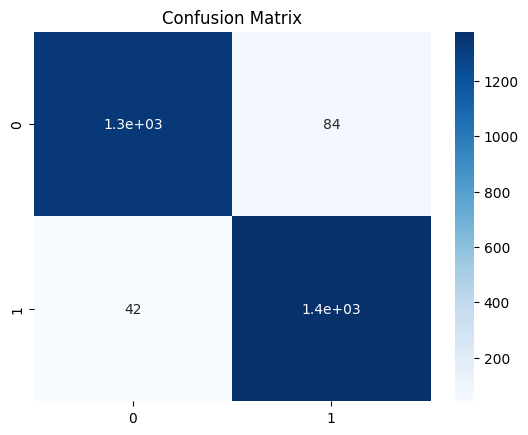

In [ ]:
model=lgb.LGBMClassifier(max_depth=18, num_leaves=95)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)

print("The Accuracy of hypertuned LightGBM model is = ",accuracy_score(y_pred,y_test))
# Print the confusion matrix
print()

sns.heatmap(matrix, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Classification Report

In [ ]:
# Calculate the classification report
report = classification_report(y_test, y_pred, output_dict=True)

df = pd.DataFrame(report).transpose()

# Apply formatting and styling to the DataFrame
df.style.set_caption('Classification Report').set_properties(**{'text-align': 'center'})

,precision,recall,f1-score,support
0,0.969521,0.940845,0.954968,1420.000000
1,0.942544,0.970423,0.956280,1420.000000
accuracy,0.955634,0.955634,0.955634,0.955634
macro avg,0.956033,0.955634,0.955624,2840.000000
weighted avg,0.956033,0.955634,0.955624,2840.000000


Calculating ROC curve

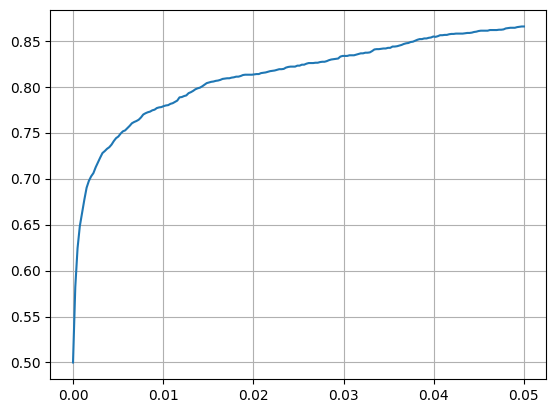

The best ROC score is: 0.8654929577464788


In [ ]:
# ROC curve of the Light GBM model

ROC_curve(X_test,y_test,y_pred,model)

# **XGBoost Classifier**

In [ ]:

params = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [120,130,140],
    'max_depth': [10,15],
}

# Create an XGBoost classifier.
xgb_clf = XGBClassifier(random_state=42)

# Perform grid search to find the best hyperparameters.
grid_xgb = GridSearchCV(xgb_clf, params, cv=5, n_jobs=-1)
grid_xgb.fit(X_train, y_train)

# Print the best hyperparameters.
print("Best parameters:", grid_xgb.best_params_)

# Evaluate the classifier on the test set using the best hyperparameters.
y_pred = grid_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 140}
Accuracy: 0.9535211267605633


Confusion Matrix

The Accuracy of hypertuned LightGBM model is =  0.9535211267605633


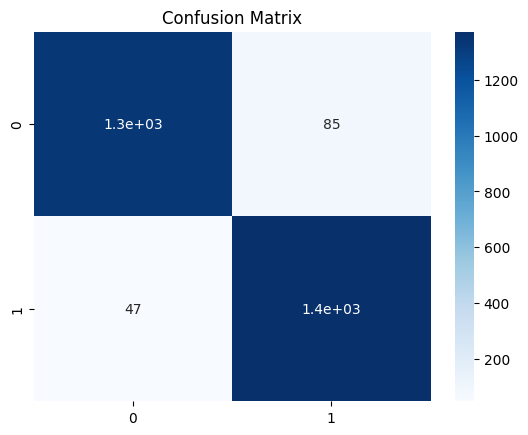

In [ ]:
matrix = confusion_matrix(y_test, y_pred)

print("The Accuracy of hypertuned LightGBM model is = ",accuracy_score(y_pred,y_test))
# Print the confusion matrix

sns.heatmap(matrix, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Classification Report

In [ ]:
# Calculate the classification report
report = classification_report(y_test, y_pred, output_dict=True)

df = pd.DataFrame(report).transpose()

# Apply formatting and styling to the DataFrame
df.style.set_caption('Classification Report').set_properties(**{'text-align': 'center'})

,precision,recall,f1-score,support
0,0.965991,0.940141,0.952891,1420.000000
1,0.941701,0.966901,0.954135,1420.000000
accuracy,0.953521,0.953521,0.953521,0.953521
macro avg,0.953846,0.953521,0.953513,2840.000000
weighted avg,0.953846,0.953521,0.953513,2840.000000


ROC curve

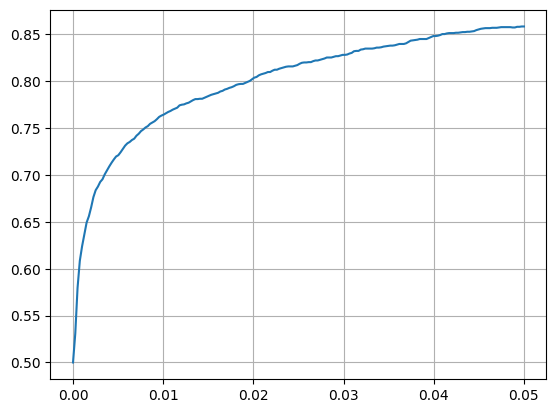

The best ROC score is: 0.8584507042253521


In [ ]:
# ROC curve of the Light GBM model

ROC_curve(X_test,y_test,y_pred,grid_xgb)

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
depths = [5, 10, 15, 20, 25, 30]
accuracies = []
results = pd.DataFrame(columns=['Max Depth', 'Accuracy'])
for depth in depths:
  dtc = DecisionTreeClassifier(max_depth = depth, random_state=42)
  dtc.fit(X_train, y_train)
  y_pred = dtc.predict(X_test)
  conf_matrix = confusion_matrix(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  accuracies.append(accuracy)
  results = results.append({'Max Depth': depth, 'Accuracy': accuracy}, ignore_index=True)

print(results)

   Max Depth  Accuracy
0        5.0  0.814789
1       10.0  0.878521
2       15.0  0.901408
3       20.0  0.896479
4       25.0  0.901056
5       30.0  0.901056


Depth V/S Accuracy

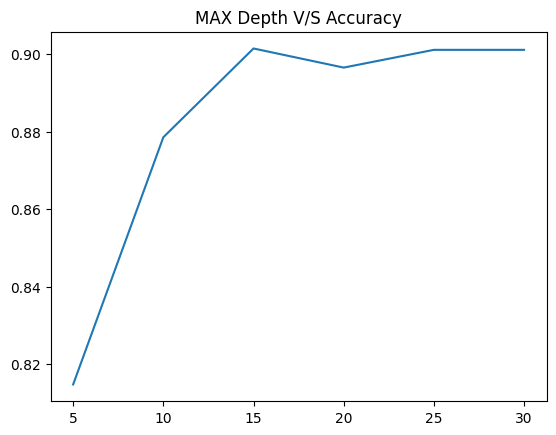

In [ ]:
plt.plot(depths, accuracies)
plt.title("MAX Depth V/S Accuracy")
plt.show()

**Applying Grid Search**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
dt_classifier = DecisionTreeClassifier()

# Define the hyperparameters you want to tune
hyperparameters = {'max_depth': [1, 2, 3, 4, 5],
                   'min_samples_leaf': [1, 2, 3, 4, 5],
                   'min_samples_split': [2, 3, 4, 5, 6]}

In [ ]:
grid_search = GridSearchCV(dt_classifier, hyperparameters, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6]})

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.8086323458265745


Confusion Matrix

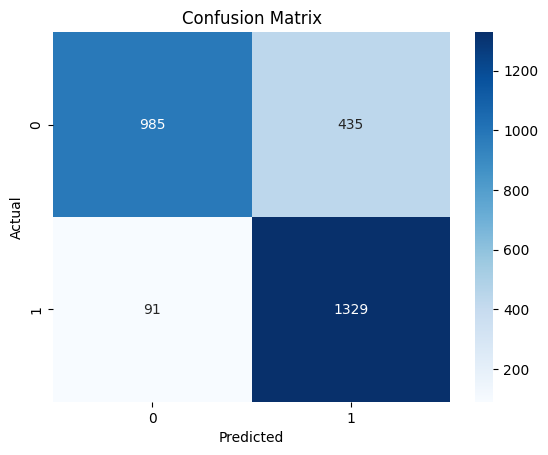

In [ ]:
dt_model = DecisionTreeClassifier(random_state = 42, max_depth = 5, min_samples_leaf = 2, min_samples_split = 2)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Roc Curve

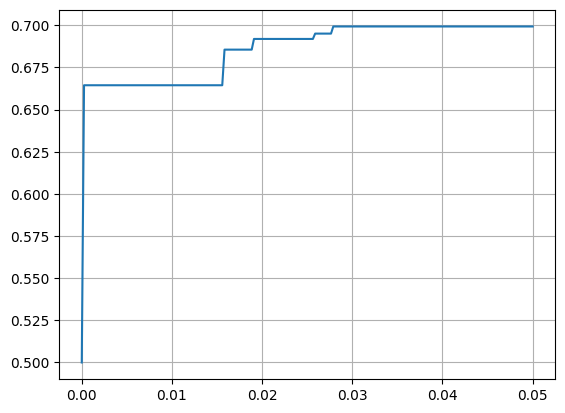

The best ROC score is: 0.6992957746478874


In [ ]:
ROC_curve(X_test,y_test,y_pred,dt_model)

In [ ]:
# Calculate the classification report
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()

# Apply formatting and styling to the DataFrame
df.style.set_caption('Classification Report').set_properties(**{'text-align': 'center'})

,precision,recall,f1-score,support
0,0.915428,0.693662,0.789263,1420.000000
1,0.753401,0.935915,0.834799,1420.000000
accuracy,0.814789,0.814789,0.814789,0.814789
macro avg,0.834414,0.814789,0.812031,2840.000000
weighted avg,0.834414,0.814789,0.812031,2840.000000


# **Random Forest**



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Create a random forest classifier and perform grid search to find the best hyperparameters
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy: 0.9287658726770825


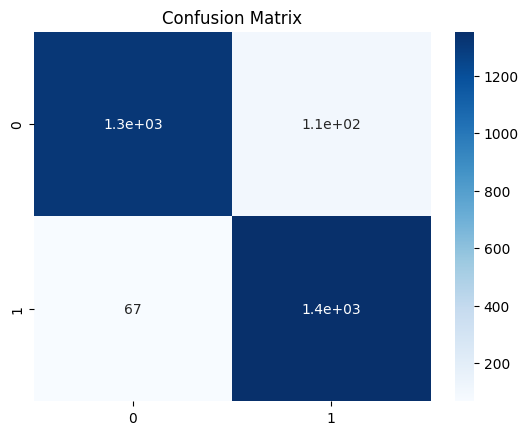

In [ ]:
rf_model = RandomForestClassifier(random_state = 42, max_depth = None, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 50)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix

sns.heatmap(matrix, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Calculate the classification report
report = classification_report(y_test, y_pred, output_dict=True)

df = pd.DataFrame(report).transpose()

# Apply formatting and styling to the DataFrame
df.style.set_caption('Classification Report').set_properties(**{'text-align': 'center'})

,precision,recall,f1-score,support
0,0.951484,0.925352,0.938236,1420.000000
1,0.927347,0.952817,0.939910,1420.000000
accuracy,0.939085,0.939085,0.939085,0.939085
macro avg,0.939416,0.939085,0.939073,2840.000000
weighted avg,0.939416,0.939085,0.939073,2840.000000


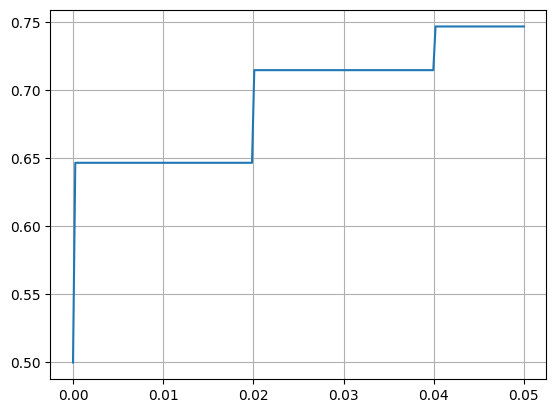

The best ROC score is: 0.7464788732394366


In [ ]:
ROC_curve(X_test,y_test,y_pred,rf_model)

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create a logistic regression classifier and perform grid search to find the best hyperparameters
lr = LogisticRegression(random_state=42)
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)


Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best accuracy: 0.8113483024559607


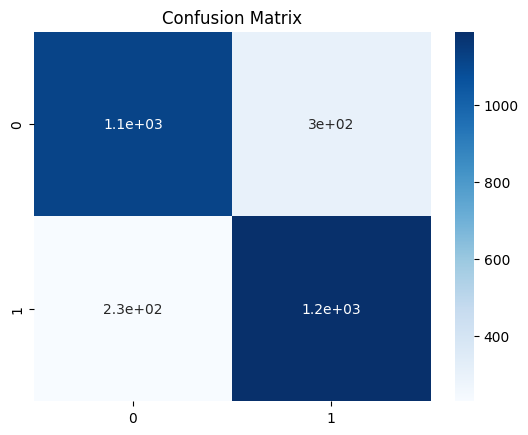

In [ ]:
lr_model = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'liblinear', random_state = 42)
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix

sns.heatmap(matrix, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Calculate the classification report
report = classification_report(y_test, y_pred, output_dict=True)

df = pd.DataFrame(report).transpose()

# Apply formatting and styling to the DataFrame
df.style.set_caption('Classification Report').set_properties(**{'text-align': 'center'})

,precision,recall,f1-score,support
0,0.828380,0.785211,0.806218,1420.000000
1,0.795850,0.837324,0.816060,1420.000000
accuracy,0.811268,0.811268,0.811268,0.811268
macro avg,0.812115,0.811268,0.811139,2840.000000
weighted avg,0.812115,0.811268,0.811139,2840.000000


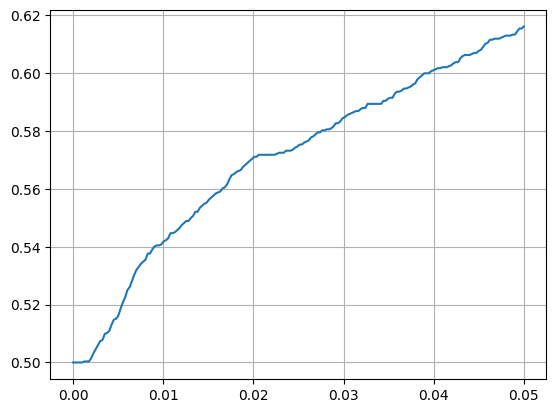

The best ROC score is: 0.6161971830985915


In [ ]:
ROC_curve(X_test,y_test,y_pred,lr_model)

# **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix


# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters to tune
params = {'C': [0.1, 1], 'gamma': [0.1, 10], 'kernel': ['linear', 'rbf']}

# Create an SVM object
svc = SVC(probability=True)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svc, params, cv=5)
grid_search.fit(X_train, y_train)


# Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters:", grid_search.best_params_)
print("Validation accuracy:", grid_search.best_score_)


Best hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Validation accuracy: 0.9397769552384565


# **Artificial Neural Network**

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define your model architecture
model = Sequential()
model.add(Dense(32, input_dim=10, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train your model
history=model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
208/208 [==============================] - 2s 4ms/step - loss: 1.1412 - accuracy: 0.7084 - val_loss: 0.4897 - val_accuracy: 0.7451
Epoch 2/100
208/208 [==============================] - 1s 3ms/step - loss: 0.4761 - accuracy: 0.7618 - val_loss: 0.4649 - val_accuracy: 0.7651
Epoch 3/100
208/208 [==============================] - 1s 3ms/step - loss: 0.4597 - accuracy: 0.7753 - val_loss: 0.4764 - val_accuracy: 0.7655
Epoch 4/100
208/208 [==============================] - 1s 3ms/step - loss: 0.4552 - accuracy: 0.7866 - val_loss: 0.4395 - val_accuracy: 0.7926
Epoch 5/100
208/208 [==============================] - 1s 4ms/step - loss: 0.4279 - accuracy: 0.7975 - val_loss: 0.4618 - val_accuracy: 0.7729
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 0.4306 - accuracy: 0.8037 - val_loss: 0.4297 - val_accuracy: 0.7930
Epoch 7/100
208/208 [==============================] - 1s 5ms/step - loss: 0.4141 - accuracy: 0.8120 - val_loss: 0.4144 - val_accuracy: 0.8137

Plotting the loss and Accuracy graphs

89/89 [==============================] - 1s 7ms/step - loss: 0.3781 - accuracy: 0.8303


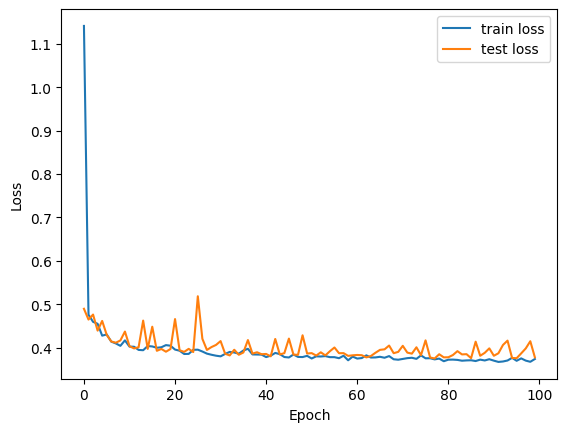

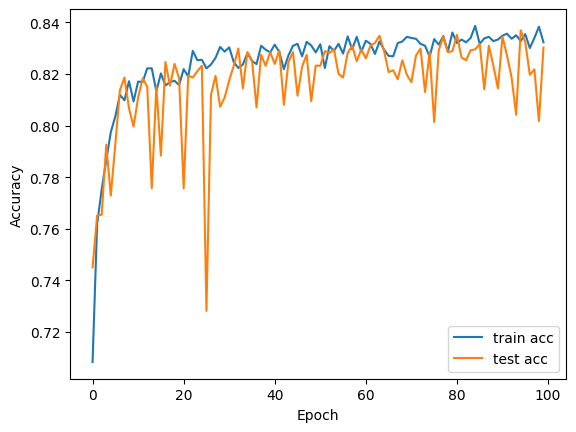

89/89 [==============================] - 0s 2ms/step


In [22]:
# Evaluate your model
loss, accuracy = model.evaluate(X_test, y_test)

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print()
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='test acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Make predictions

y_pred = model.predict(X_test)

Classification report

In [20]:
# Calculate the classification report

y_pred

y_pred_1=np.round_(y_pred).astype('int')

report = classification_report(y_test, y_pred_1, output_dict=True)

df = pd.DataFrame(report).transpose()

# Apply formatting and styling to the DataFrame
df.style.set_caption('Classification Report').set_properties(**{'text-align': 'center'})

,precision,recall,f1-score,support
0,0.871632,0.774648,0.820283,1420.000000
1,0.797212,0.885915,0.839226,1420.000000
accuracy,0.830282,0.830282,0.830282,0.830282
macro avg,0.834422,0.830282,0.829755,2840.000000
weighted avg,0.834422,0.830282,0.829755,2840.000000


ROC Curve

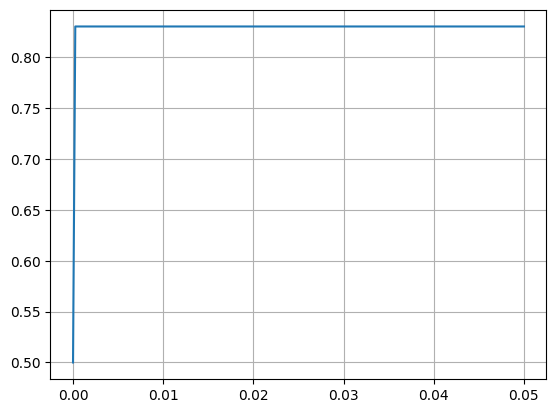

The best ROC score is: 0.8302816901408451


In [21]:
roc_scores = []

thresholds = np.linspace(0, 0.05, 200)
for threshold in thresholds:
    pred = np.where(y_pred_1[:, 0] < threshold, 0, 1)

    cm = confusion_matrix(y_test, pred)
    roc_score = auc(y_test, pred)
    roc_scores.append(roc_score)

    # Visualize the change in ROC score with a change in threshold.

roc_scores = np.array(roc_scores)
best_roc_score = np.max(roc_scores)
best_threshold = thresholds[np.argmax(roc_scores)]

plt.plot(thresholds, roc_scores)
plt.grid()
plt.show()

print("The best ROC score is:", best_roc_score)


## **Bagging**

In [29]:
from sklearn.ensemble import BaggingClassifier


X_axis=[]
Y_axis=[]
for i in range(3,30,3):
  # Create a decision tree classifier
  tree = DecisionTreeClassifier()

  # Create a bagging classifier that uses decision tree as the base estimator
  bagging = BaggingClassifier(tree, n_estimators=i)

  # Train the bagging classifier on the training data
  bagging.fit(X_train, y_train)

  # Evaluate the performance of the bagging classifier on the testing data
  score = bagging.score(X_test, y_test)
  X_axis.append(i)
  Y_axis.append(score)

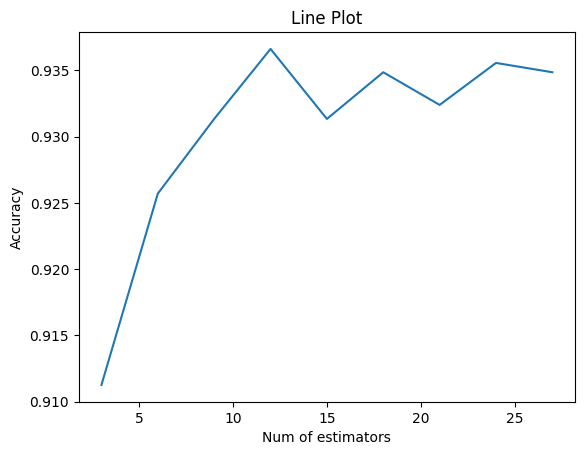

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x=X_axis, y=Y_axis)

# Add labels and title
plt.xlabel('Num of estimators')
plt.ylabel('Accuracy')
plt.title('Line Plot')

# Show the plot
plt.show()

Hypertuned Bagging Classifier

In [32]:
tree = DecisionTreeClassifier()

# Create a bagging classifier that uses decision tree as the base estimator
bagging = BaggingClassifier(tree, n_estimators=12)

# Train the bagging classifier on the training data
bagging.fit(X_train, y_train)

y_pred=bagging.predict(X_test)

Classification Report

In [26]:
# Calculate the classification report
report = classification_report(y_test, y_pred, output_dict=True)

df = pd.DataFrame(report).transpose()

# Apply formatting and styling to the DataFrame
df.style.set_caption('Classification Report').set_properties(**{'text-align': 'center'})

,precision,recall,f1-score,support
0,0.946103,0.914789,0.930183,1420.000000
1,0.917519,0.947887,0.932456,1420.000000
accuracy,0.931338,0.931338,0.931338,0.931338
macro avg,0.931811,0.931338,0.931319,2840.000000
weighted avg,0.931811,0.931338,0.931319,2840.000000


ROC curve

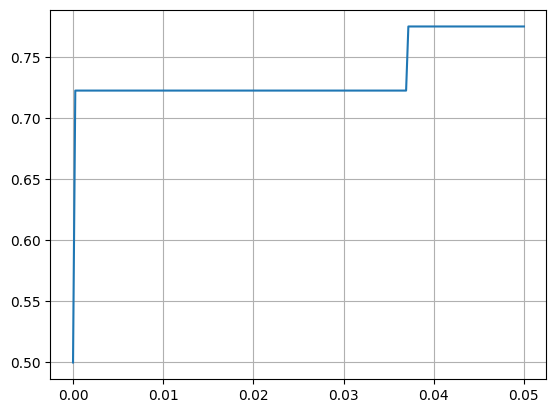

The best ROC score is: 0.7749999999999999


In [27]:
# ROC curve of the Light GBM model

ROC_curve(X_test,y_test,y_pred,bagging)